In [4]:
from ultralytics import YOLO
import os

In [5]:
# Load the nano model
model = YOLO('C:/Users/zebzi/Documents/School/Master_Year/CSCI 5525/Project/YOLOv8/10_epochs_result/weights/best.pt')

In [ ]:
path_to_data = 'C:/Users/zebzi/Documents/School/Master_Year/CSCI 5525/Project/YOLOv8/'
epoch = 2

results = model.train(
    mode='detect',
    data=path_to_data + 'data.yaml',
    imgsz=416,
    epochs=epoch,
    batch=8,
    name=path_to_data + f'{epoch}_epochs_result'
)

In [6]:
a = model.predict(
    source = "C:/Users/zebzi/Downloads/Chess Pieces.v24-416x416_aug.yolov8/train/images/ca869123d8a0cbcc6e54f4a445e5a78a_jpg.rf.5a9d4bcaf2ccf730c794bb7d57d77524.jpg",
    conf=0.25
)

# print(a[0])


image 1/1 C:\Users\zebzi\Downloads\Chess Pieces.v24-416x416_aug.yolov8\train\images\ca869123d8a0cbcc6e54f4a445e5a78a_jpg.rf.5a9d4bcaf2ccf730c794bb7d57d77524.jpg: 416x416 1 black-bishop, 1 black-king, 3 black-knights, 5 black-pawns, 2 black-rooks, 1 white-bishop, 1 white-king, 1 white-knight, 4 white-pawns, 1 white-queen, 1 white-rook, 42.3ms
Speed: 1.2ms preprocess, 42.3ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)


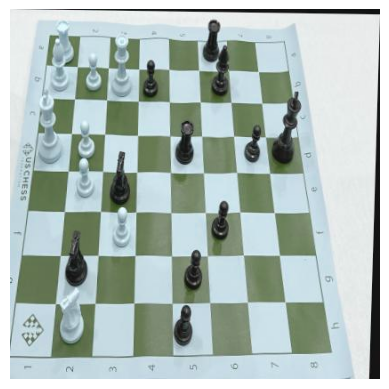

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 9.,  3., 11.,  7.,  6., 10.,  4.,  3.,  2., 10.,  4.,  1., 10., 12.,  8.,  4.,  4., 10.,  4.,  3.,  6.])
conf: tensor([0.9862, 0.9817, 0.9761, 0.9664, 0.9627, 0.9484, 0.9362, 0.9288, 0.9218, 0.9084, 0.9060, 0.9043, 0.8978, 0.8953, 0.8940, 0.8848, 0.8530, 0.8352, 0.6170, 0.3675, 0.3094])
data: tensor([[5.0985e+01, 3.0915e+02, 8.8003e+01, 3.7984e+02, 9.8619e-01, 9.0000e+00],
        [5.8894e+01, 2.4372e+02, 9.2815e+01, 3.1497e+02, 9.8170e-01, 3.0000e+00],
        [1.1200e+02, 2.0041e+01, 1.4237e+02, 1.0354e+02, 9.7610e-01, 1.1000e+01],
        [4.2581e+01, 3.2678e+01, 7.0067e+01, 9.5324e+01, 9.6636e-01, 7.0000e+00],
        [2.1463e+02, 5.5809e+00, 2.4180e+02, 6.3734e+01, 9.6273e-01, 6.0000e+00],
        [1.1302e+02, 2.1991e+02, 1.3983e+02, 2.7133e+02, 9.4843e-01, 1.0000e+01],
        [2.2448e+02, 2.1075e+02, 2.5059e+02, 2.6347e+02, 9.3619e-01, 4.0000e+00],
        [1.0901e+02, 1.5488e+02, 1.4063e+02, 2.2174e+02, 9.2

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(a[0].orig_img)
plt.axis('off')  # Turn off axis numbers
plt.show()

print(a[0].boxes)


cropped_image.shape = (70, 38, 3)
cropped_image.shape = (71, 34, 3)
cropped_image.shape = (83, 30, 3)
cropped_image.shape = (63, 28, 3)
cropped_image.shape = (58, 27, 3)
cropped_image.shape = (52, 26, 3)
cropped_image.shape = (53, 26, 3)
cropped_image.shape = (67, 31, 3)
cropped_image.shape = (90, 37, 3)
cropped_image.shape = (47, 25, 3)
cropped_image.shape = (50, 24, 3)
cropped_image.shape = (65, 26, 3)
cropped_image.shape = (49, 23, 3)
cropped_image.shape = (57, 25, 3)
cropped_image.shape = (92, 37, 3)
cropped_image.shape = (53, 27, 3)
cropped_image.shape = (49, 22, 3)
cropped_image.shape = (51, 27, 3)
cropped_image.shape = (54, 28, 3)
cropped_image.shape = (59, 29, 3)
cropped_image.shape = (59, 28, 3)


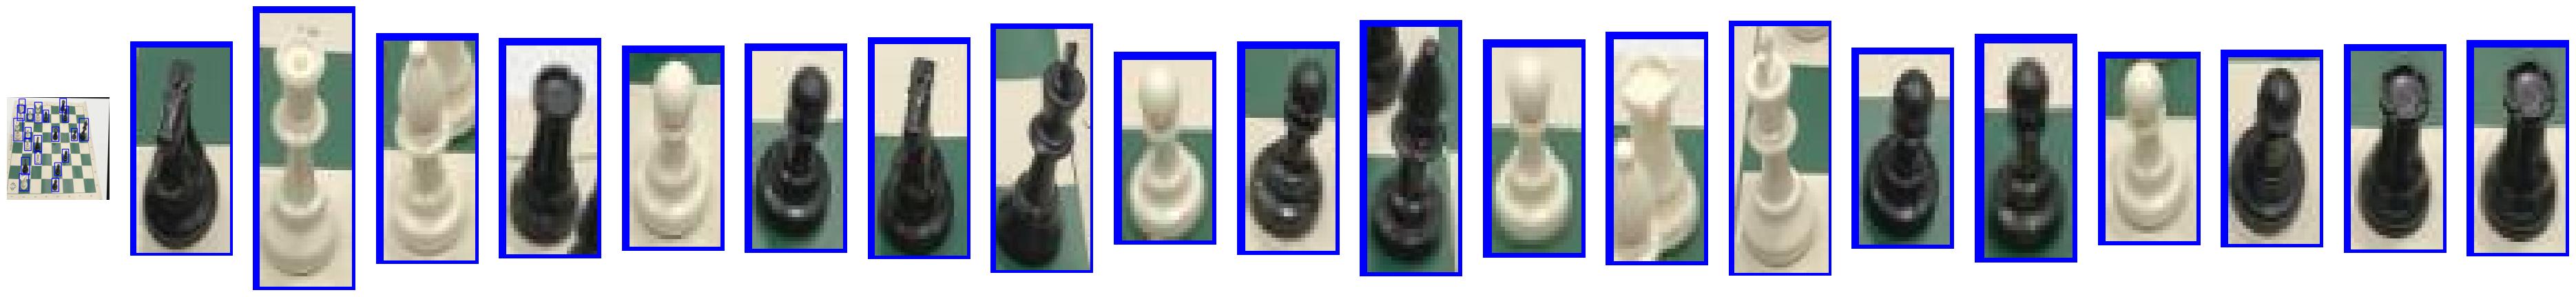

In [8]:
import cv2
import numpy as np

num_boxes = len(a[0].boxes.xywhn)
image = a[0].orig_img
copy_image = np.copy(image)

plt.figure(figsize=(48, 24))

for i in range(num_boxes):
    bbox = a[0].boxes[i].xywhn
    img_h, img_w = a[0].orig_shape

    x_center, y_center, width, height = bbox[0][0], bbox[0][1], bbox[0][2], bbox[0][3]

    x1 = int((x_center - width / 2) * img_w)
    y1 = int((y_center - height / 2) * img_h)
    x2 = int((x_center + width / 2) * img_w)
    y2 = int((y_center + height / 2) * img_h)

    cv2.rectangle(image, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)

    temp_image = np.copy(copy_image)
    cv2.rectangle(temp_image, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)

    plt.subplot(1, num_boxes, i + 1)
    cropped_image = temp_image[y1:y2, x1:x2]
    print(f"{cropped_image.shape = }")
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')



plt.subplot(1, num_boxes, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()